## 1 - Análise exploratória dos dados (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importando os dados de imposto arrecadado 

In [2]:
df_declaracao_servico = pd.read_csv('../Datasets/iss_declaracao_anonimizado.csv', sep=';')
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,201106,Prestado,"127,24"
1,2,1,201907,Prestado,"587,1348"
2,3,1,201112,Prestado,"160,62"
3,4,1,201704,Prestado,"312,94"
4,5,1,202304,Prestado,"122,54"
...,...,...,...,...,...
281430,281431,6365,202305,Prestado,90
281431,281432,6366,202304,Prestado,"135,96"
281432,281433,6367,202305,Prestado,260
281433,281434,6368,202305,Tomado,20


##### Realizando os tratamentos nos dados

###### Convertendo o valor de imposto para o tipo float

In [3]:
df_declaracao_servico['imposto'] = df_declaracao_servico['imposto'].str.replace(',', '.').astype(float).round(2) 

###### Convertendo a competência para uma data

In [4]:
df_declaracao_servico['competencia'] = df_declaracao_servico['competencia'].astype(str) + '01'
df_declaracao_servico['competencia'] = pd.to_datetime(df_declaracao_servico['competencia'], format='%Y%m%d')

###### Filtrando os dados para apenas os serviços prestados, que são o foco do dataset

In [5]:
df_servicos_prestados = df_declaracao_servico[df_declaracao_servico['tipo'] == 'Prestado']
df_servicos_prestados = df_servicos_prestados.drop(columns=['tipo', 'row'])

##### Filtrando o período dos dados
###### Foi optado o período de **01/2008** até **03/2003** pois este intervalo apresenta dados com menos alterações do ambiente de qualidade
###### Além disso, os dados das declarações mais recentes não estavam completos

In [10]:
df_servicos_prestados = df_servicos_prestados[(df_servicos_prestados['competencia'] <= '2023-03-01') & (df_servicos_prestados['competencia'] >= '2008-01-01')]
df_servicos_prestados

,id_empresa,competencia,imposto
0,1,2011-06-01,127.24
1,1,2019-07-01,587.13
2,1,2011-12-01,160.62
3,1,2017-04-01,312.94
5,1,2014-11-01,225.12
...,...,...,...
281415,6351,2023-03-01,6.40
281417,6353,2023-03-01,36.00
281419,6354,2023-03-01,397.04
281421,6356,2023-03-01,231.15


#### Importando os dados das empresas

In [12]:
df_impresas = pd.read_csv('../Datasets/dados_empresa_anonimizado.csv')
df_impresas = df_impresas.dropna()
df_impresas

,Unnamed: 0,id_empresa,data_inicio_atividade,data_cadastro,nome_economico,nome_bairro
0,0,5801,2021-05-28,2021-07-26,Empresa 5801,Bairro 1
1,1,6086,2022-05-16,2022-05-18,Empresa 6086,Bairro 1
2,2,590,2012-10-02,2012-11-01,Empresa 590,Bairro 1
3,3,543,2012-08-01,2012-08-30,Empresa 543,Bairro 1
4,4,538,2012-06-18,2012-08-23,Empresa 538,Bairro 1
...,...,...,...,...,...,...
6360,6360,3210,2013-09-13,2013-12-03,Empresa 3210,Bairro 947
6361,6361,3788,2014-03-07,2016-02-02,Empresa 3788,Bairro 1261
6362,6362,3204,2013-11-18,2013-11-05,Empresa 3204,Bairro 3945
6363,6363,3362,2014-05-15,2014-05-29,Empresa 3362,Bairro 22954


###### Removendo colunas não utilizadas

In [13]:
df_impresas = df_impresas.drop(columns=['Unnamed: 0', 'data_inicio_atividade', 'data_cadastro', 'nome_economico'])

### **Gráficos**

##### Total de ISS declarado por mês

<AxesSubplot: title={'center': 'Arrecadação ISS mensal'}, xlabel='competencia'>

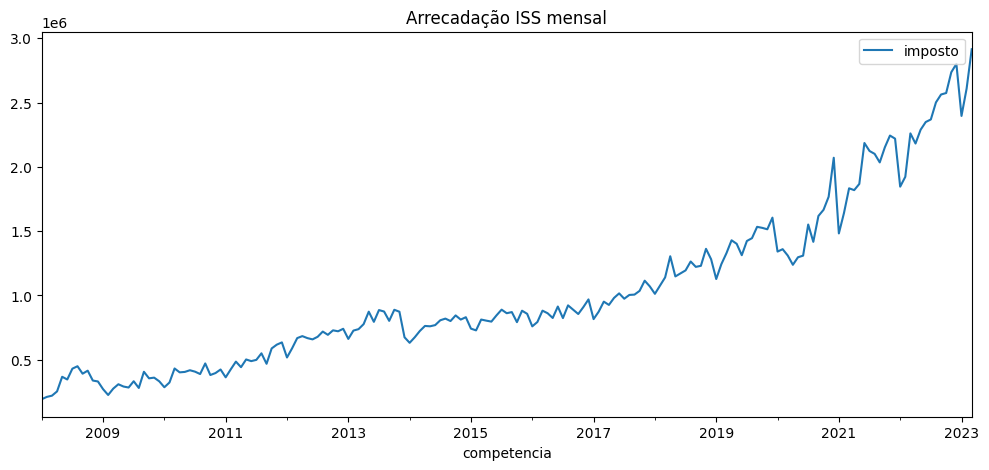

In [11]:
df_iss = df_servicos_prestados.drop(columns=['id_empresa']).groupby(['competencia']).sum(['imposto'])

df_iss['imposto'].plot(figsize=(12,5), title ='Arrecadação ISS mensal', legend=True)

##### Total de ISS declarado por ano
###### OBS: a parte final do gráfico apresenta uma queda, pois, o ano de 2023 possui pouca informação no dataset

<AxesSubplot: title={'center': 'Arrecadação ISS anual'}, xlabel='ano'>

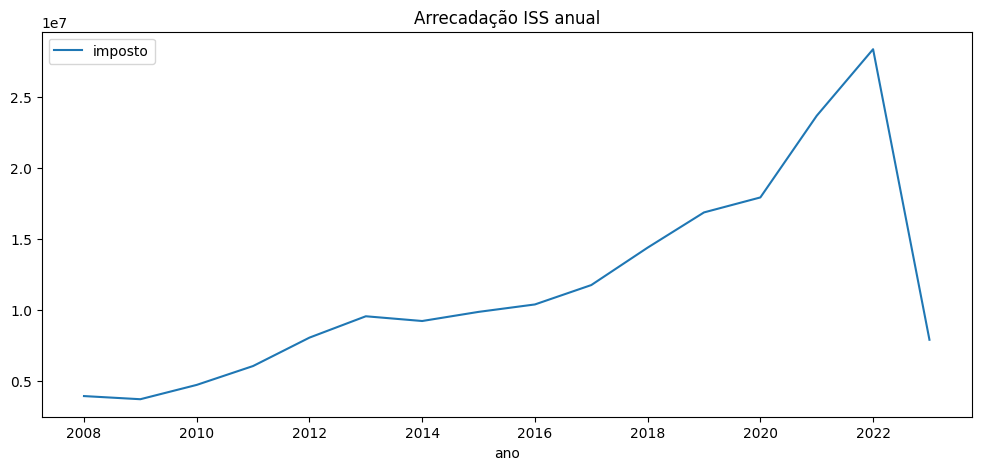

In [9]:
df_iss = df_servicos_prestados.copy()
# criando coluna de ano 
df_iss['ano'] = df_iss['competencia'].dt.year
df_iss = df_iss.drop(columns=['competencia'])
# agrupando o imposto por ano
df_iss = df_iss.drop(columns=['id_empresa']).groupby(['ano']).sum(['imposto'])

df_iss['imposto'].plot(figsize=(12,5), title ='Arrecadação ISS anual', legend=True)

###### Criando dataset de ISS por bairro

In [14]:
df_iss_bairro = pd.merge(df_servicos_prestados, df_impresas, on='id_empresa').drop(columns=['id_empresa']).groupby(['competencia', 'nome_bairro']).sum(['imposto'])
df_iss_bairro = df_iss_bairro.reset_index()
df_iss_bairro

,competencia,nome_bairro,imposto
0,2008-01-01,Bairro 1,50096.66
1,2008-01-01,Bairro 10,3071.59
2,2008-01-01,Bairro 11,970.33
3,2008-01-01,Bairro 12,31937.81
4,2008-01-01,Bairro 13,18303.70
...,...,...,...
4662,2023-03-01,Bairro 5,61103.52
4663,2023-03-01,Bairro 6,84123.30
4664,2023-03-01,Bairro 7,139395.33
4665,2023-03-01,Bairro 8,75837.57


##### Faturamento total por bairro

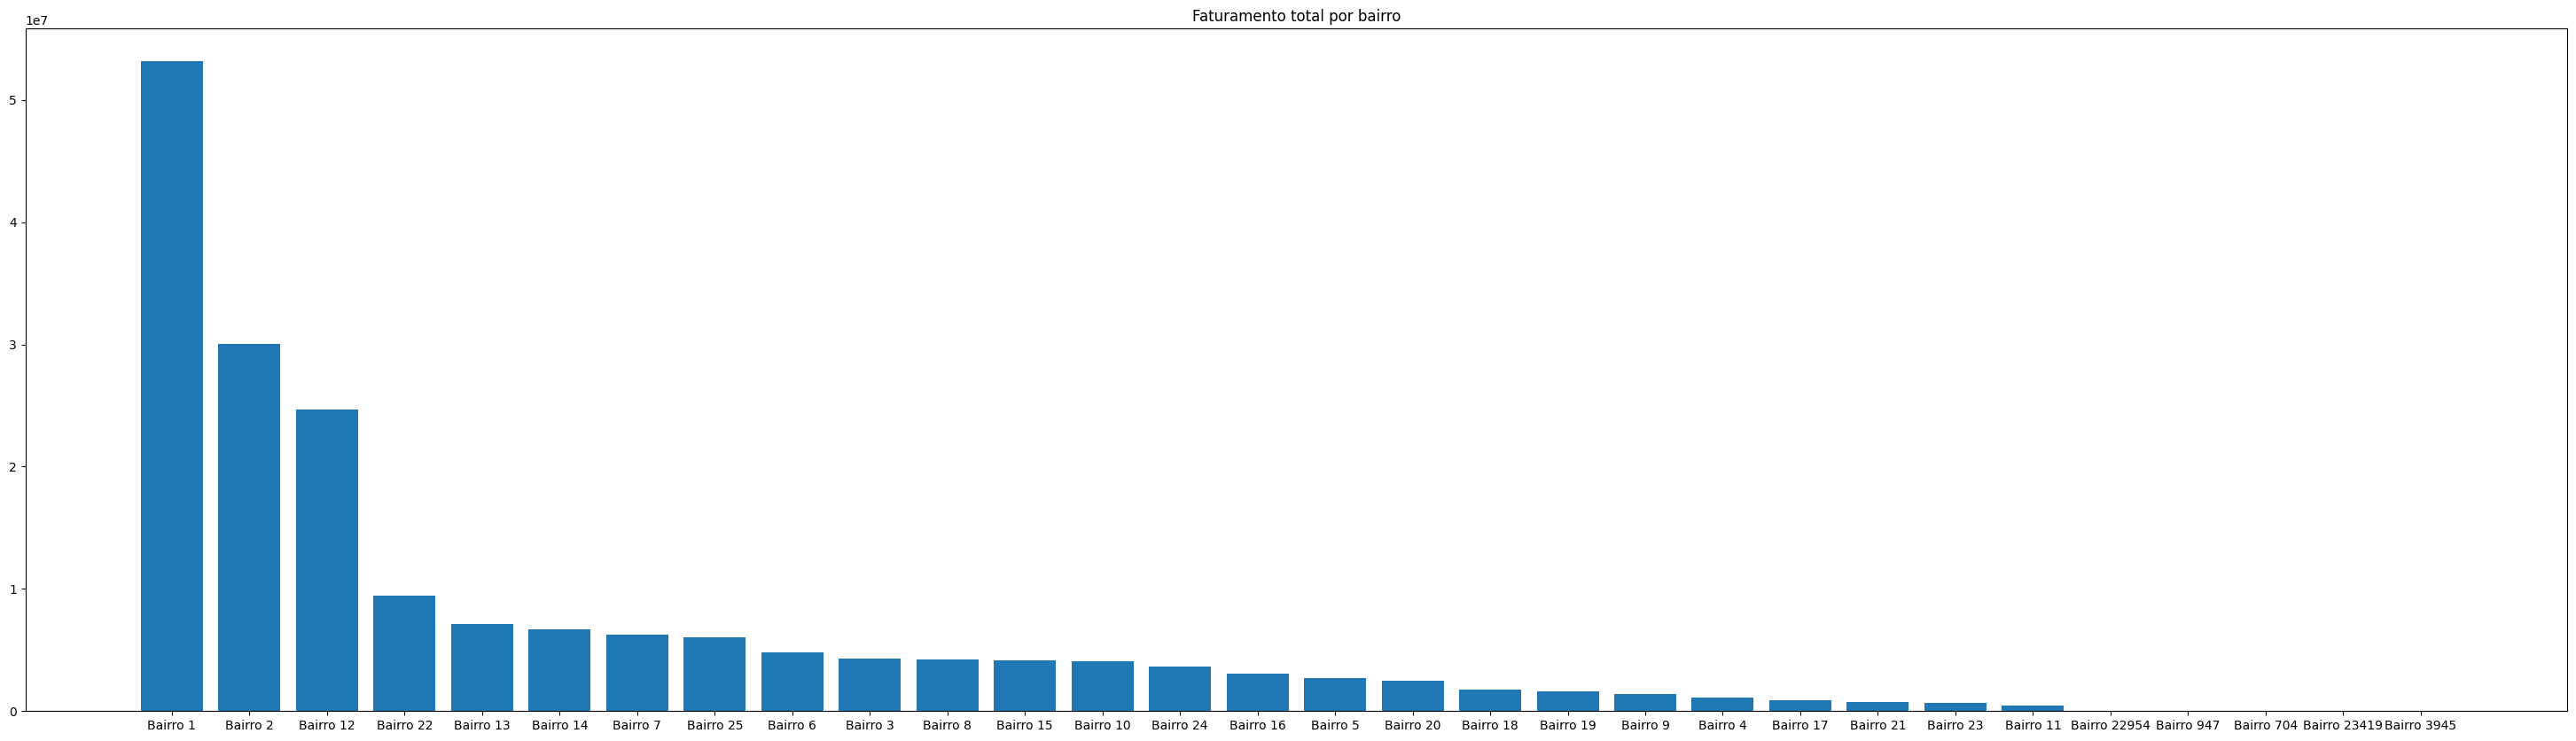

In [21]:
total_bairro = df_iss_bairro.drop(columns=['competencia']).groupby(['nome_bairro']).sum(['imposto'])
total_bairro = total_bairro.reset_index()
total_bairro= total_bairro.sort_values(by=['imposto'], ascending=False)

nome_barras = total_bairro['nome_bairro'].values
tamanho_barras = total_bairro['imposto'].values
y_pos = np.arange(len(nome_barras))

plt.figure(figsize=(37,10))
plt.bar(y_pos, tamanho_barras)
plt.xticks(y_pos, nome_barras)
plt.title('Faturamento total por bairro')
plt.show()


##### Faturamento mensal por bairro (4 Maiores arrecadadores)

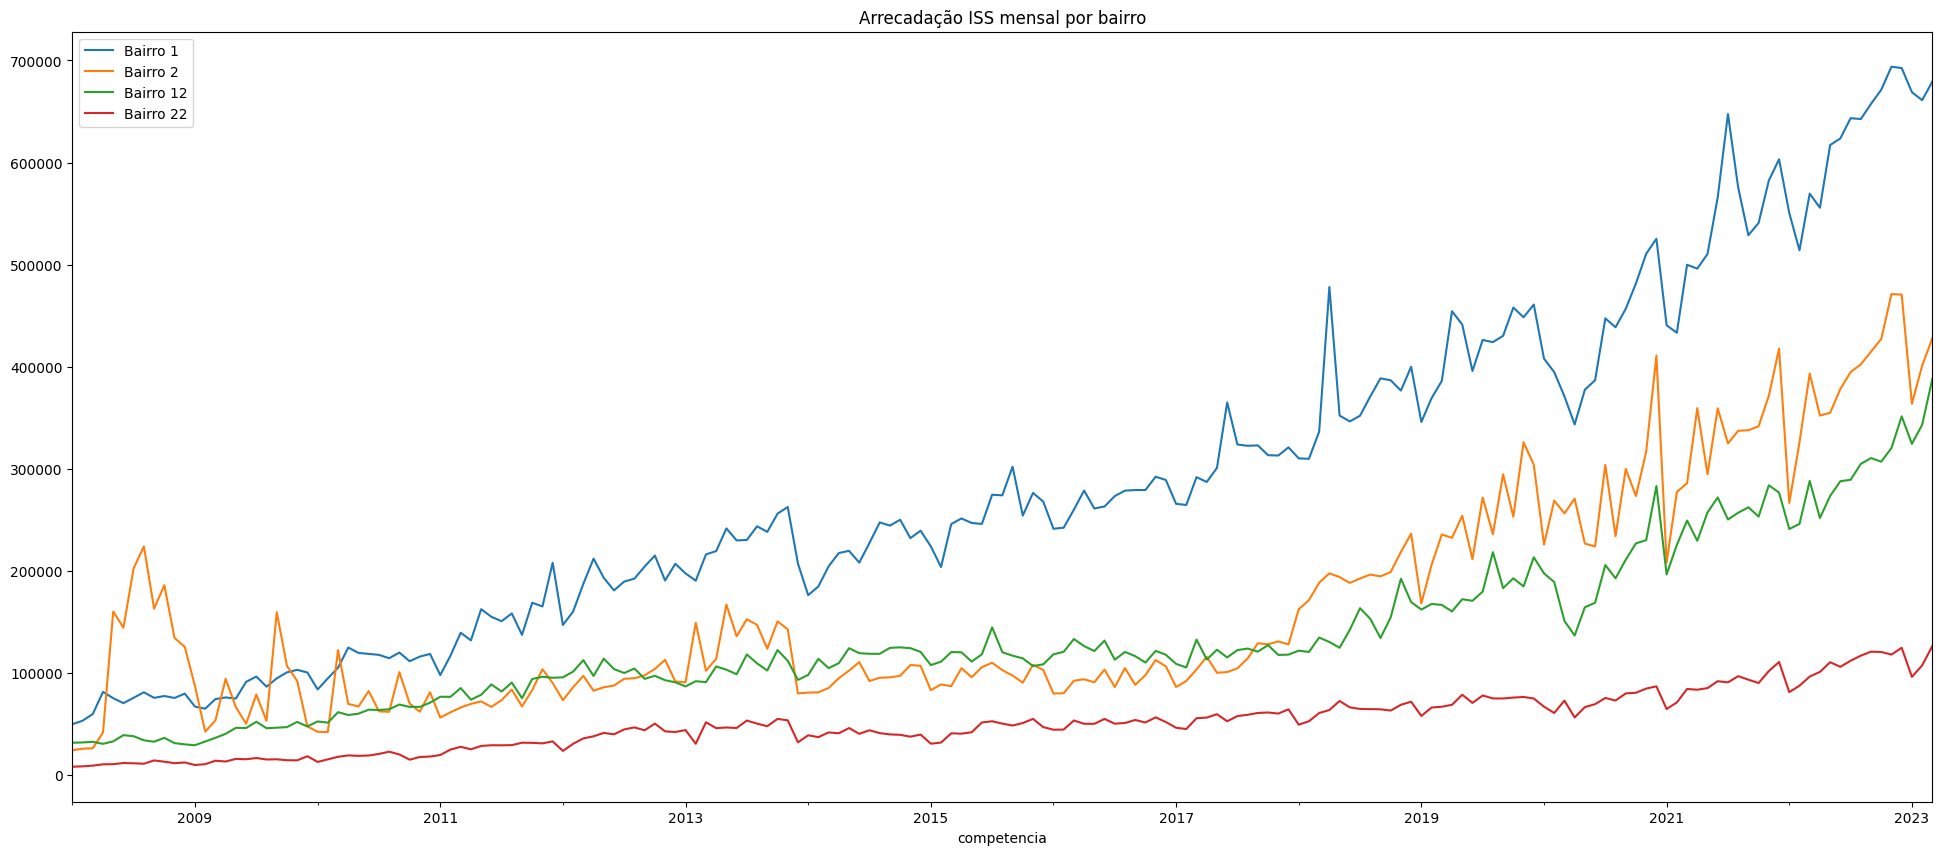

In [16]:
bairros_maior_faturamento = ['Bairro 1','Bairro 2','Bairro 12', 'Bairro 22']

for bairro in bairros_maior_faturamento:
    df_dados_bairro = df_iss_bairro[df_iss_bairro['nome_bairro'] == bairro]
    df_dados_bairro = df_dados_bairro.drop(columns=['nome_bairro']).groupby(['competencia']).sum(['imposto'])
    df_dados_bairro = df_dados_bairro.rename(columns={'imposto':bairro})
    df_dados_bairro[bairro].plot(figsize=(24,10), title ='Arrecadação ISS mensal por bairro', legend=True)


##### Faturamento anual por bairro (4 Maiores arrecadadores)
###### OBS: a parte final do gráfico apresenta uma queda, pois, o ano de 2023 possui pouca informação no dataset

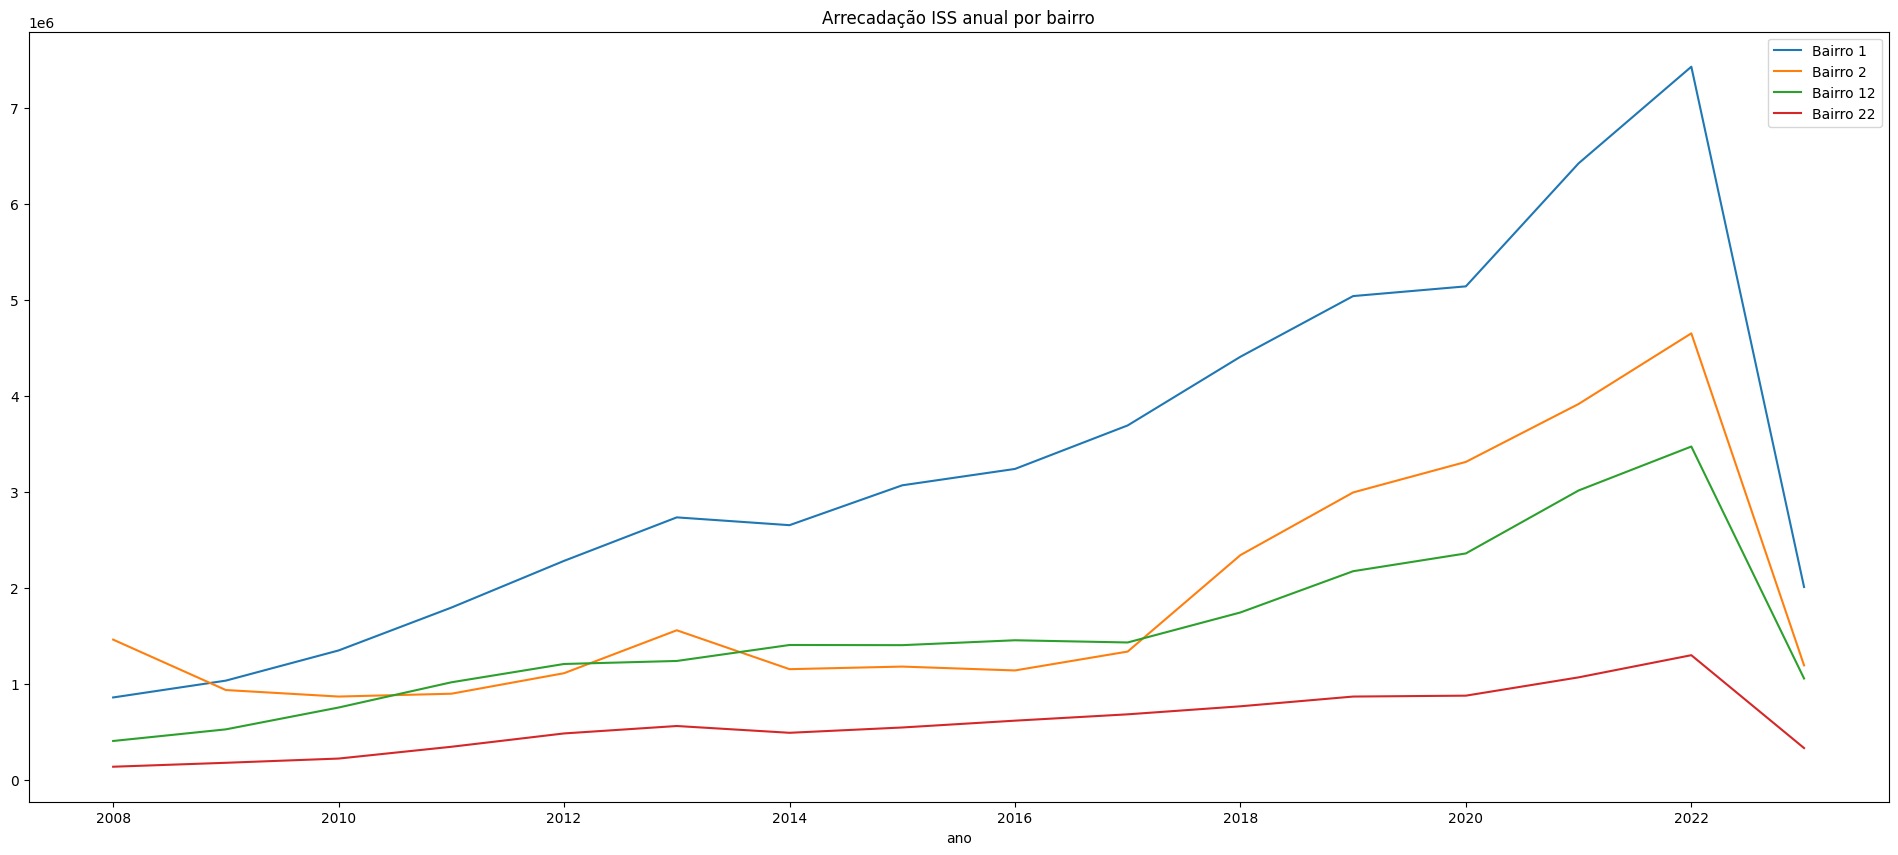

In [18]:
df_iss_bairro_anual = df_iss_bairro.copy()
df_iss_bairro_anual['ano'] = df_iss_bairro_anual['competencia'].dt.year
df_iss_bairro_anual = df_iss_bairro_anual.drop(columns=['competencia'])
df_iss_bairro_anual = df_iss_bairro_anual.groupby(['nome_bairro','ano']).sum(['imposto']).reset_index()

for bairro in bairros_maior_faturamento:
    df_dados_bairro_anual = df_iss_bairro_anual[df_iss_bairro_anual['nome_bairro'] == bairro]
    df_dados_bairro_anual = df_dados_bairro_anual.drop(columns=['nome_bairro']).groupby(['ano']).sum(['imposto'])
    df_dados_bairro_anual = df_dados_bairro_anual.rename(columns={'imposto':bairro})
    df_dados_bairro_anual[bairro].plot(figsize=(24,10), title ='Arrecadação ISS anual por bairro', legend=True)
